# Introduction to neural network classification with Tensorflow

In this notebook we are going to learn how to write neural networks for classification problems

A classification problem is where you try to classify something as one thing or another

A few types of classification problems:
* Binary classification = 2 classes
* Multi class classification = (Multi class) Each class has 1 label
* Multi label classification = (Multi label) Each class has more than 1 label

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000
# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check out the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now lets visualise it

In [4]:
import pandas as pd

circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


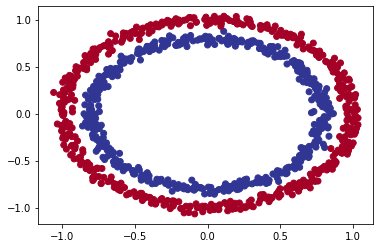

In [5]:
# Visualiser with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);


## Input and output shapes


In [6]:
# Check the shape of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we are working with
len(X), len(y)

(1000, 1000)

In [8]:
# View the first example of features and labels
X[1],y[1]

(array([-0.75615888,  0.15325888]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...



In [9]:
# import tensorflow
import tensorflow as tf
tf.__version__

'2.8.2'

In [10]:
# Set random seed
tf.random.set_seed(42)

# 1. create the model using the sequqentail api
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])
# 2. compile the model
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
# 3. fit the model
model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 953us/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 997us/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 962us/step - loss: 0.6942 - accuracy: 0.4830


In [11]:
# Improve our model by training for longer
# SHOULD IDEALLY FIT ON TRAINING DATA AND EVALUATE ON TESTING DATA

model_1.fit(X,y,epochs=200, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we are working on a binary classification problem and our model is getting around 50% accuracy, its performing as if it guessing

lets step it up a notch and add an extra layer

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. create the model using the sequqentail api
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1),
                               tf.keras.layers.Dense(1)
])
# 2. compile the model
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
# 3. fit the model
model_2.fit(X,y,epochs=100, verbose=0)

In [13]:
# 4. Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

In [14]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

# Improve our model

Lets look to see how we can improve our model.

1. Create a model - add more layers or increase number of hidden units with a layer
2. compile model - here we might want to choose a different optimisation function: Adam instead of SGD?
3. fit model - Perhaps fit model for more epochs (train for longer)


In [15]:
# Set random seed
tf.random.set_seed(42)

# 1. create the model using the sequqentail api
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100), # Add layer with 100 neuron
                               tf.keras.layers.Dense(10), # Add layer with 10 neuron
                               tf.keras.layers.Dense(1)
])
# 2. compile the model
model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(), # Change optimizer function
                metrics=["accuracy"])
# 3. fit the model
model_3.fit(X,y,epochs=100, verbose=0)

In [16]:
# 4. evaluate the model 
model_3.evaluate(X,y)

32/32 [==============================] - 0s 911us/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254054069519, 0.5080000162124634]

In [17]:
model_3_preds = model_3.predict(X)

# To visualise our models prodictions, Lets create a function `plot_decision_boundary` , this function will:

* take in a trained model, features(X) and labels (y)
* create a meshgrid of different X values
* make predictions across the meshgrid
* plot the predictions as well as line between the different zones (where each unique class falls).

In [18]:
import numpy as np

In [19]:
def plot_decision_boundary(model,X,y):
  """
  plots the decision boundary created by a model predicting on X.
  """
  # Define the axis boundaries of the plot and create a mesh grid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                      np.linspace(y_min,y_max,100))
  
  # Create X values (We make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions 
  y_pred = model.predict(x_in)

  # Check for multiclass 
  if len(y_pred[0]) > 1:
    print("multiclass classification")
    # we have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # plot the decision boundary
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.xlim(yy.min(),yy.max())

  

doing binary classification


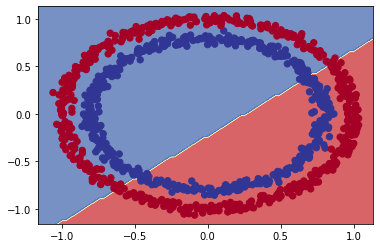

In [20]:
# Check out the precictions our mdoel is making
plot_decision_boundary(model_3,X=X,y=y)

In [21]:
x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
y_min, y_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1

x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1595024599098636,
 1.1337117525463374)

In [22]:
# lets see if our  model can be used for a regression problem [DOES NOT RUN]

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) # y = x + 100

# Split our regression data into training and test set
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit the model to the regession data
model_3.fit(X_reg_train,y_reg_train,epochs=100,verbose=0)

ValueError: ignored

Oh wait.. we compiled our model for a binary classification problem

but we are now working with a regression problem, Lets change the model to suit our data

In [23]:
# Set random seed
tf.random.set_seed(42)

# 1. create the model using the sequqentail api
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100), # Add layer with 100 neuron
                               tf.keras.layers.Dense(10), # Add layer with 10 neuron
                               tf.keras.layers.Dense(1)
])
# 2. compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(), # Change optimizer function
                metrics=["mae"])
# 3. fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
            y_reg_train, 
            epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

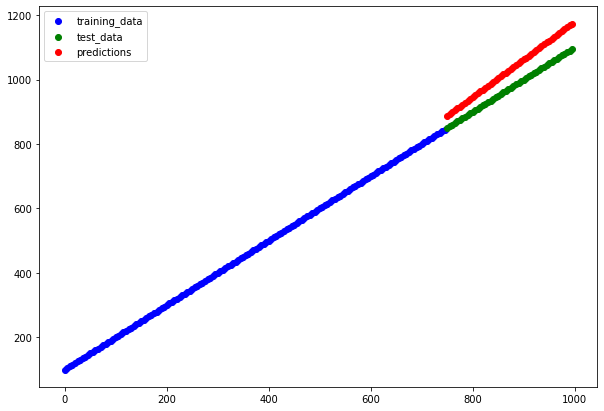

In [25]:
# make predictions with our traied model

y_reg_preds = model_3.predict(X_reg_test)

# plot the models predictions against our regression data

plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c="b",label="training_data")
plt.scatter(X_reg_test,y_reg_test,c="g",label="test_data")
plt.scatter(X_reg_test,y_reg_preds,c="r",label="predictions")
plt.legend();

## The missing piece: Non-linearity

In [26]:
# Set the random seed
tf.random.set_seed(42)

# 1. create the model

model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

#2. compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"]
                )

#3. fit the model
history = model_4.fit(X,y,epochs=100,verbose=1)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 943us/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 973us/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 991us/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/100
32

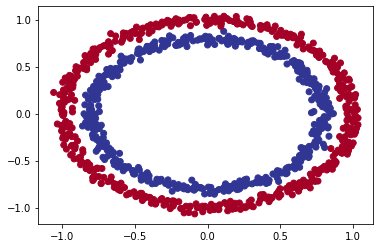

In [27]:
# Check out our data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

doing binary classification


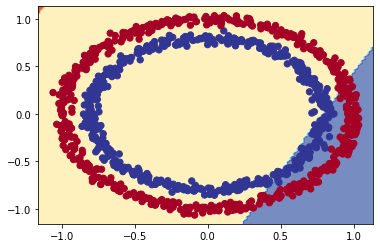

In [28]:
# Check the decision boundary for  our latest model
plot_decision_boundary(model=model_4,X=X,y=y
                       )

Lets try build our first newural network with a non linear activation function.

In [29]:
# Set the random seed
tf.random.set_seed(42)

# 1. create the model

model_5 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

#2. compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"]
                )

#3. fit the model
history = model_5.fit(X,y,epochs=100,verbose=1)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 993us/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 943us/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 908us/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 946us/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 959us/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 930us/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/

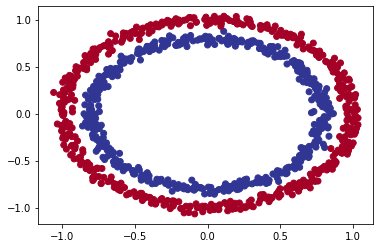

In [30]:
# Check out our data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [31]:
# Time to replicate multi layer neural network from tensorflow playground in code

# Set the random seed
tf.random.set_seed(42)

# 1. create the model

model_6 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(1,),
])

#2. compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"]
                )

#3. fit the model
history = model_6.fit(X,y,epochs=250,verbose=1)

Epoch 1/250


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/250
32/32 [=

In [32]:
# Evaluate the model
model_6.evaluate(X,y)

32/32 [==============================] - 0s 935us/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

doing binary classification


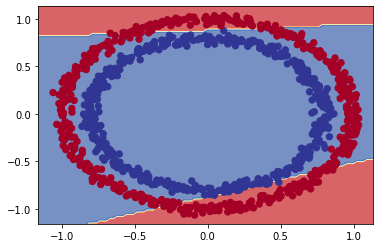

In [33]:
# How does model prdictions look

# Check the decision boundary for  our latest model
plot_decision_boundary(model=model_6,X=X,y=y
                       )

In [34]:
# Final model outplut layer set to sigmoid activation

# Set the random seed
tf.random.set_seed(42)

# 1. create the model

model_7= tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid),
])

#2. compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"]
                )

#3. fit the model
history = model_7.fit(X,y,epochs=250,verbose=1)

Epoch 1/250


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 0s 1ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/250
32/32 [=

doing binary classification


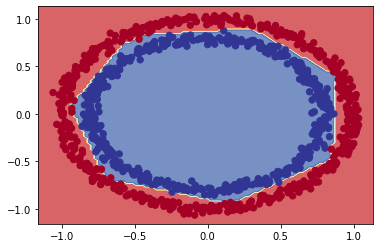

In [35]:
# How does model prdictions look

# Check the decision boundary for  our latest model
plot_decision_boundary(model=model_7,X=X,y=y
                       )

In [36]:
# Evaluate the model
model_7.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0459 - accuracy: 0.9920


[0.04593365266919136, 0.9919999837875366]

Combination of **linear (straight lines) and non linear (non straight lines) functions** is one of the key fundementals of neural networks.

Now we have discussed the concept of linear and non linear functions , lets see them in action

In [37]:
# Create a toy tensor (sinular to the data we pass into our models)

A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

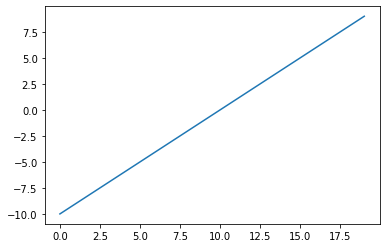

In [38]:
# Visualise our toy tensor
plt.plot(A)

In [39]:
# lets start by replicating sigmoid - 1 / (1+ exp(-x))

def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

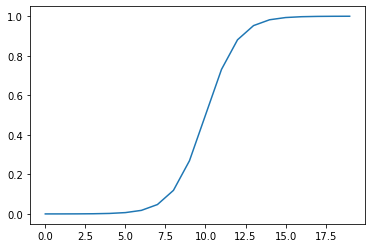

In [40]:
plt.plot(sigmoid(A))

In [41]:
# lets start by replicating relu - maximum between 0 and x i.e if x<0 then return 0

def relu(x):
  return tf.maximum(0,x)

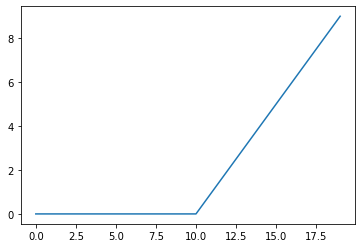

In [42]:
plt.plot(relu(A))

In [43]:
# lets start by replicating linear - 1 / (1+ exp(-x))

def linear(x):
  return x

## Evaluating and improving our classification

So far we have been training and testing on the same data set

however in machine learning its not good
lets create training and test set


In [44]:
# check how many examples
len(X) 

1000

In [45]:
# Split into train and test set 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
len(X), len(X_train), len(X_test)

(1000, 800, 200)

In [46]:
# lets recreate a model to fit on the training data and evaluate on the test data

# Set the random seed
tf.random.set_seed(42)

# 1. create the model

model_8= tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid),
])

#2. compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"]
                )

#3. fit the model
history = model_8.fit(X_train,y_train,epochs=250,verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [47]:
# Evaluate the model
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0579 - accuracy: 0.9750


[0.057937804609537125, 0.9750000238418579]

doing binary classification
doing binary classification


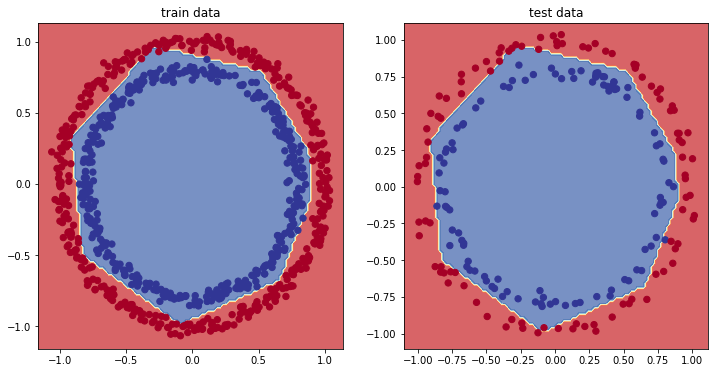

In [48]:
# plot the decision boundaries for the training and test set

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train data")
plot_decision_boundary(model_8,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("test data")
plot_decision_boundary(model_8,X=X_test,y=y_test)
plt.show()


In [49]:
## Plot the loss (or training) curves

print (history.history)

{'loss': [0.6823503375053406, 0.6749704480171204, 0.6679719686508179, 0.6634892821311951, 0.6591553688049316, 0.6474893689155579, 0.631162166595459, 0.6093025803565979, 0.5843716263771057, 0.5442498922348022, 0.49146702885627747, 0.43143409490585327, 0.3877747356891632, 0.340543657541275, 0.30260780453681946, 0.2626255452632904, 0.23670430481433868, 0.21137739717960358, 0.19696928560733795, 0.17787015438079834, 0.19187654554843903, 0.15553784370422363, 0.1478690505027771, 0.1299954652786255, 0.14445829391479492, 0.11218511313199997, 0.10827228426933289, 0.0961880311369896, 0.08745841681957245, 0.08136770129203796, 0.07781152427196503, 0.07349678874015808, 0.06893371045589447, 0.06380417943000793, 0.05980909243226051, 0.059475041925907135, 0.06067722290754318, 0.05669660493731499, 0.049126844853162766, 0.04732038825750351, 0.04888376593589783, 0.04379119351506233, 0.04447992146015167, 0.04451775923371315, 0.04065559804439545, 0.038387831300497055, 0.03698822110891342, 0.0363055616617202

In [50]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.682350,0.56375
1,0.674970,0.56500
2,0.667972,0.57625
3,0.663489,0.57250
4,0.659155,0.57125
...,...,...
245,0.013872,0.99625
246,0.013563,0.99250
247,0.012500,0.99500
248,0.020423,0.99375


Text(0.5, 1.0, 'model_8 loss curves')

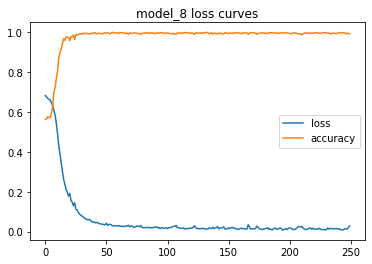

In [51]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("model_8 loss curves")

**Note:** For many problems the loss function going down means the model is improving (the predictions its making are getting closer to the ground truth labels).

## Finding the best learning rate

to find the ideal learning rate (the learning rate where the loss decreases the most during training), we are going to use the following steps:
* A learning rate **callback** - you can think of a call back as an extra piece of functionality, you can add to your model **WHILE** its training
* Another model (we could use hte same one as above, but we are practiciing building models)
* A modified loss curves plot.

In [52]:
# Set random seed
tf.random.set_seed(42)

# create the model
model_9 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])
# compile the model
model_9.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
# fit the model passing lr_scheduler callback
history_9 = model_9.fit(X_train,y_train,epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6910 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.4975 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.5075 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6888 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6881 - accuracy: 0.5075 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6873 - accuracy: 0.5050 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6864 - accuracy: 0.5088 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss:

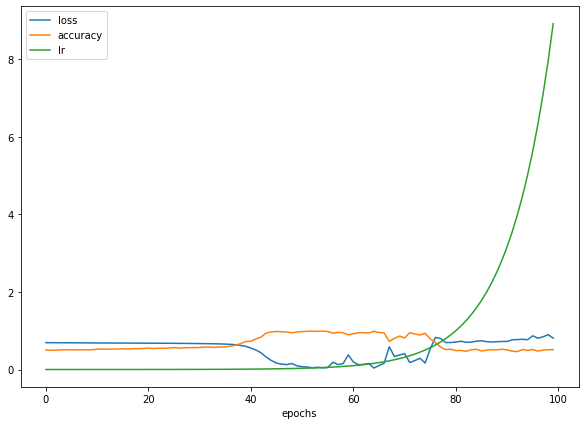

In [53]:
pd.DataFrame(history_9.history).plot(figsize=(10,7),xlabel="epochs")

Text(0.5, 1.0, 'learning rate vs loss')

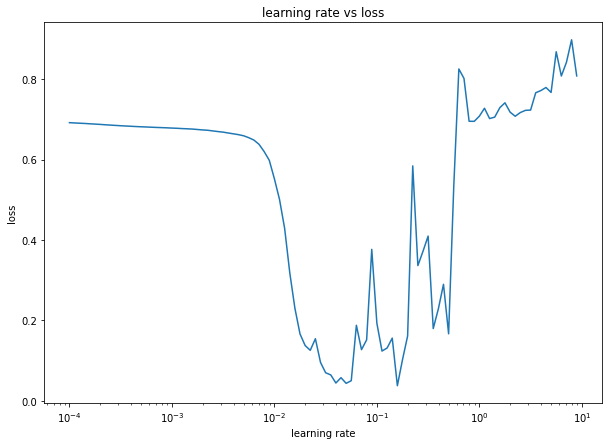

In [54]:
# Plot the learning rate against the loss

lrs = 1e-4* (10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("learning rate vs loss")

In [55]:
# Example of other typical learning rate values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [56]:
# Lets try using a higher ideal learning rate with the same model as before

# Set random seed
tf.random.set_seed(42)

# create the model
model_10 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])
# compile the model
model_10.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.02),
                metrics=["accuracy"])
# create a learning rate callback
#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
# fit the model 20 epchs passing lr_scheduler callback
history_10 = model_10.fit(X_train,y_train,epochs=20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 0s 1ms/step - loss: 0.6801 - accuracy: 0.5863
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6694 - accuracy: 0.5888
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6533 - accuracy: 0.6075
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6342 - accuracy: 0.6475
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5787 - accuracy: 0.7200
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5361 - accuracy: 0.7500
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4275 - accuracy: 0.8662
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3479 - accuracy: 0.9137
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2778 - accuracy: 0.9350
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2362 - accuracy: 0.9538
Epoch 11/20
25/25 [===========

In [57]:
# Evaluate model 10 on the test data set
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2150 - accuracy: 0.9100


[0.21504612267017365, 0.9100000262260437]

In [58]:
# evaluate model 8 on test data
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0579 - accuracy: 0.9750


[0.057937804609537125, 0.9750000238418579]

doing binary classification
doing binary classification


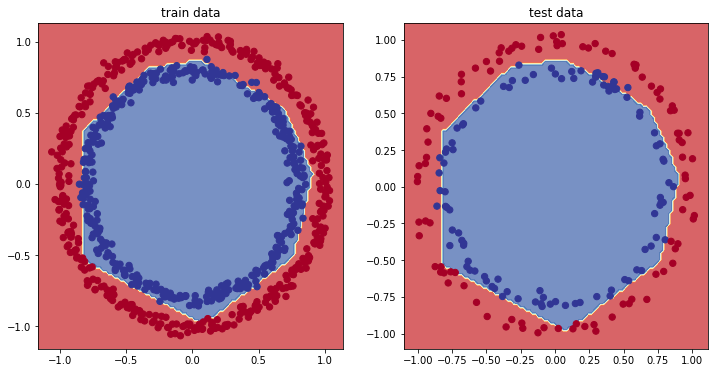

In [59]:
# plot the decision boundaries for training and test set

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train data")
plot_decision_boundary(model_10,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("test data")
plot_decision_boundary(model_10,X=X_test,y=y_test)
plt.show()


## More classification evaluation methods

Alongside visualising our models results as much as possible , there are a handful of other classification evaluation methods and metrics you should be familiar with.
* Accuracy
* Precision
* Recall
* F1-score
* Confusion Matrix
* Classification report (from scikit-learn)

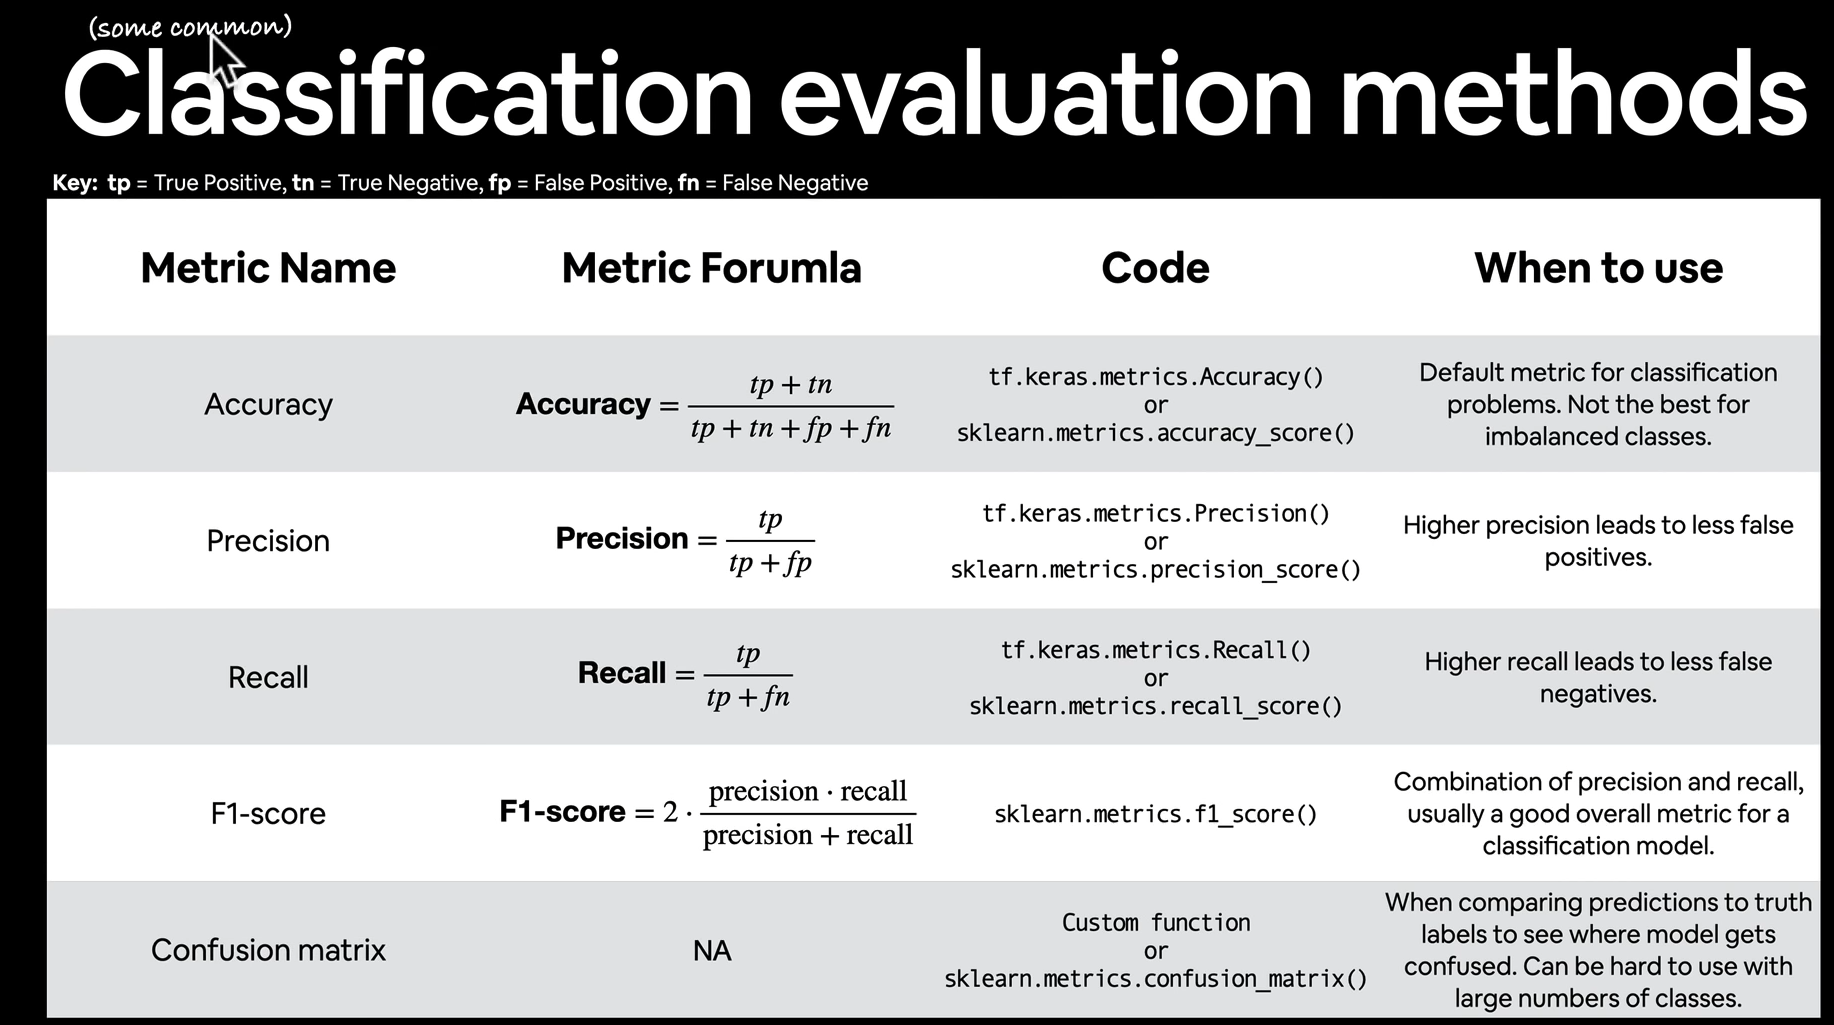

In [60]:
# check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test,y_test)
print(f"model loss on test set: {loss}")
print(f"model acuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 1ms/step - loss: 0.2150 - accuracy: 0.9100
model loss on test set: 0.21504612267017365
model acuracy on test set: 91.00%


how about a confusion matrix?


In [61]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix

# Make predictions 
y_preds = model_10.predict(X_test)

# create confusion matrix [FAILS]
confusion_matrix(y_test,y_preds)

ValueError: ignored

In [62]:
y_test[:10]

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [63]:
y_preds[:10]

array([[9.3463719e-01],
       [8.5691810e-03],
       [9.8140264e-01],
       [9.2461705e-04],
       [6.1867738e-01],
       [6.9378269e-01],
       [4.1261315e-04],
       [1.0053813e-03],
       [9.2127597e-01],
       [5.6455135e-03]], dtype=float32)

oops.. looks like our predictions array has come out in prediction probability form.. the standard output from the sigmoid/softmax activation functions.

In [64]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix

# Make predictions 
y_preds = model_10.predict(X_test)

# create confusion matrix  (convert prediction probabilities to binary format)
cf =confusion_matrix(y_test,tf.round(y_preds)) ## HAVE TO RUND Y_preds up or down
cf

array([[99,  1],
       [17, 83]])

#Prettify our confusion matrix

we are going to write remix of scikit learn plot confusion matrix

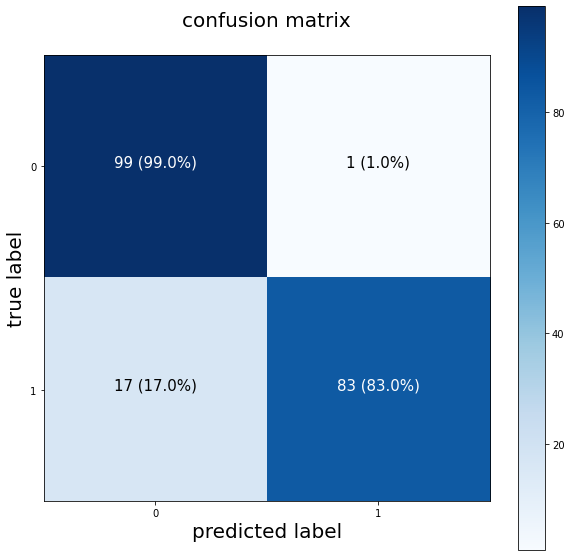

In [65]:
import itertools

figsize=(10,10)

# Create the confusion matrix
cm = confusion_matrix(y_test,tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[np.newaxis] # normalize our confusion matrix
n_classes= cm.shape[0]

# lets prettify it
fig, ax = plt.subplots(figsize=figsize)
# create a matrix plot
cax = ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)

# create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# label the axis
ax.set(title="confusion matrix",
       xlabel="predicted label",
       ylabel="true label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# set x axis to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# set threshhold for different colors
threshold= (cm.max() + cm.min())/2

# plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [144]:
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

# Working with a larger example (multiclass classification)

When you have more than 2 classes as an option, its known as a multi class classification,
* this means if you have 3 different classes, its multi-class classification.

To practice multi class classification, we are going to build a neural network to classifiy images of different items of clothing.


In [71]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# the data already sorted into training and test set for us
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()


In [75]:
# Show the first training example
print(f"training example:\n{train_data[0]}\n")
print(f"training label:\n{train_labels[0]}\n")

training example:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [74]:
# Check shape of single example
print(f"training example:\n{train_data[0].shape}\n")
print(f"training example:\n{train_labels[0].shape}\n")

training example:
(28, 28)

training example:
()



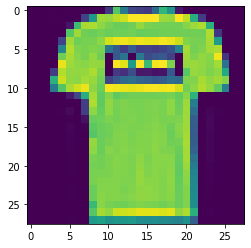

In [77]:
# plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[1])

In [80]:
# check our sampels label
train_labels[1]

0

In [81]:
# Create a small list so we can index onto our training labels so they are human readable
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Ankle boot')

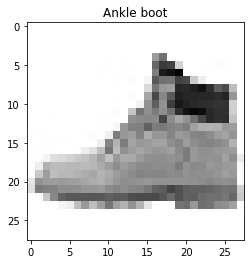

In [85]:
# Plot an example image and its label
index_of_choice = 90
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

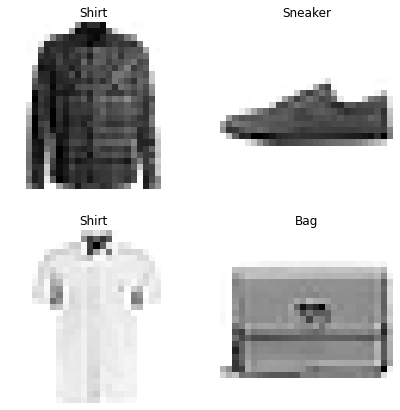

In [90]:
# plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## build a multi-class classification model

For our multi class classification model, we can use a similar architecture to our binary classifiers, however we are going to have to tweak a few things
* input shape= (28,28) the shape of one image [FLATTEN LAYER]
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
* Output layer activation = Softmax NOT SIGMOID

**Categorical entory only for ONE HOT ENCODED, USE SPARSE CATEGORICAL ENTROPY FOR NON ONE HOT ENCODED DATA**

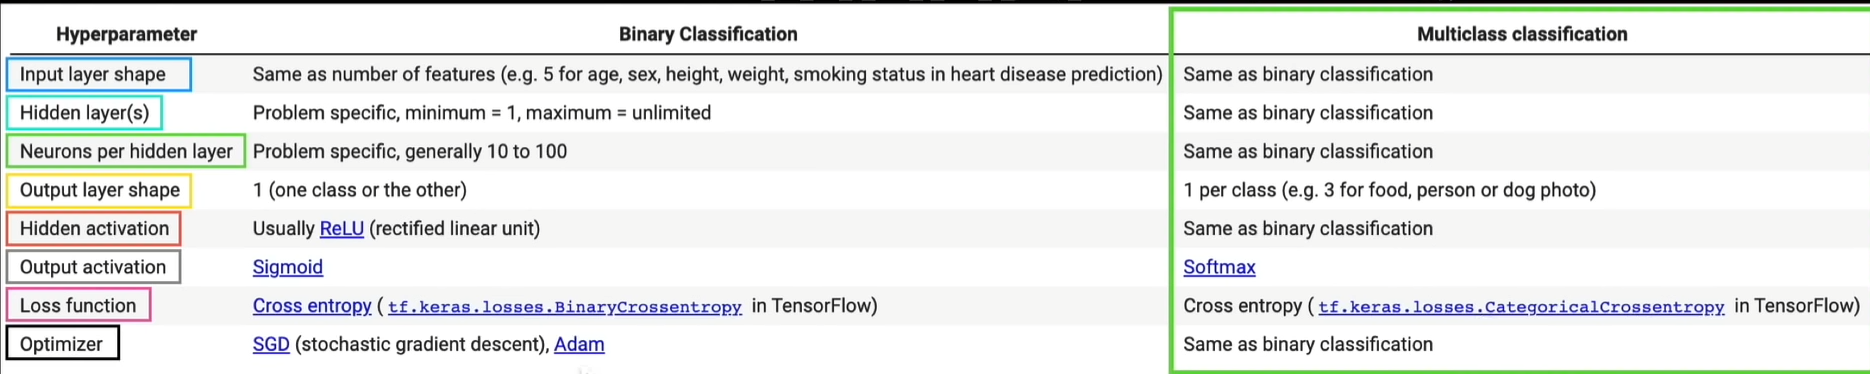

In [99]:
# Our data needs to be flattend(from 28x28 to None,784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [100]:
28*28

784

In [108]:
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [106]:
# Lets try using a higher ideal learning rate with the same model as before

# Set random seed
tf.random.set_seed(42)

# create the model
model_11 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28,28)),
                               tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])
# compile the model
model_11.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, # IMPORTANT: SPARSE CATEGORICAL ENTROY
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
non_norm_history = model_11.fit(train_data,train_labels,epochs=10, validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1643 - accuracy: 0.1609 - val_loss: 1.8304 - val_accuracy: 0.2048
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.7084 - accuracy: 0.2484 - val_loss: 1.6614 - val_accuracy: 0.2850
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6351 - accuracy: 0.2837 - val_loss: 1.6084 - val_accuracy: 0.2756
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6108 - accuracy: 0.2912 - val_loss: 1.6029 - val_accuracy: 0.3046
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6025 - accuracy: 0.2993 - val_loss: 1.5837 - val_accuracy: 0.3139
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5838 - accuracy: 0.3120 - val_loss: 1.5673 - val_accuracy: 0.3281
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5788 - accuracy: 0.3183 - val_loss: 1.5687 - val_accuracy:

In [109]:
# Check the model summary
model_11.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 4)                 3140      
                                                                 
 dense_33 (Dense)            (None, 4)                 20        
                                                                 
 dense_34 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [110]:
# Check the min and max values of training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized) , this means they like to have numbers in the tesnors they train to find patterns in between 0 and 1.

In [113]:
# We can get our training and testing data between 0 and 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# check the min and max values of scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [117]:
# Lets try using a higher ideal learning rate with the same model as before

# Set random seed
tf.random.set_seed(42)

# create the model
model_12 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28,28)),
                               tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])
# compile the model
model_12.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, # IMPORTANT: SPARSE CATEGORICAL ENTROY
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
norm_history = model_12.fit(train_data_norm,train_labels,epochs=10, validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

NOTE: NEURAL NETWORK TEND TO PREFER DATA IN NUMERICAL FORM AS WELL AS SCALED/NORMALISED FORM (NUMBERS BETWEN 0 AND 1)

In [115]:
model_12.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 4)                 3140      
                                                                 
 dense_36 (Dense)            (None, 4)                 20        
                                                                 
 dense_37 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


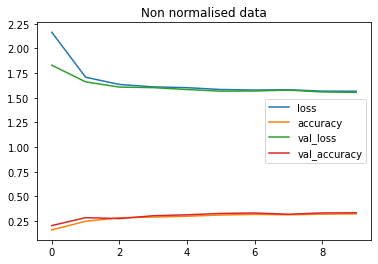

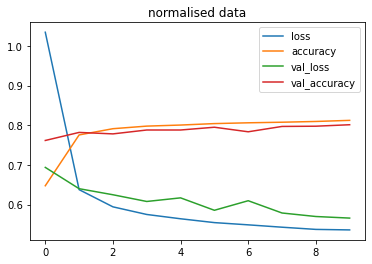

In [118]:
import pandas as pd
# plot non-normalisaed data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non normalised data")
# plot normalised data loss curves
pd.DataFrame(norm_history.history).plot(title="normalised data")

**Note:** The same model with even slightly different data can produce dramatically different results, So when comparing models its important to make sure you are comparing them on the same criteria (e.g same architecture but different data or same data data but different architecture)

## Finding the Ideal learning rate


In [120]:
# Set random seed
tf.random.set_seed(42)

# create the model
model_13 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28,28)),
                               tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])
# compile the model
model_13.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, # IMPORTANT: SPARSE CATEGORICAL ENTROY
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# fit the model
find_lr_history = model_13.fit(train_data_norm,train_labels,epochs=40, validation_data=(test_data_norm,test_labels),callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'finding the ideal learning rate')

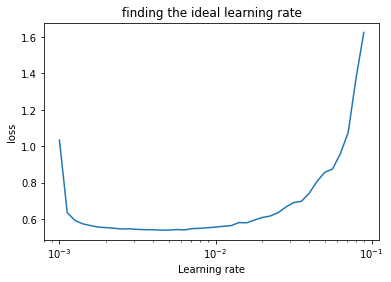

In [121]:
# plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("loss")
plt.title("finding the ideal learning rate")

In [122]:
10**-3


0.001

In [124]:
# Lets refit model with ideal leraning rate

# Set random seed
tf.random.set_seed(42)

# create the model
model_14 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28,28)),
                               tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])
# compile the model
model_14.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, # IMPORTANT: SPARSE CATEGORICAL ENTROY
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])



# fit the model
history_14 = model_14.fit(train_data_norm,train_labels,epochs=20, validation_data=(test_data_norm,test_labels))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 7s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy: 0.7836
Epo

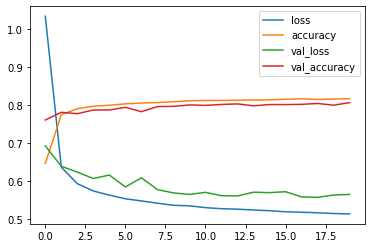

In [126]:
pd.DataFrame(history_14.history).plot()

## Evaluating our multiclass classification model

To evaluate our multiclass classification model we could:
* evaluate its peroformance using other classification metrics (such as Confusion matrix)
* Assess some of its predictions (through visualisation)
* improve its results (training for longer or changing the architecture)
* save and export the model for use in an application

Lets go through the top 2

In [134]:
y_probs = model_14.predict(test_data_norm)

# view first 5 predictions
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([8.5629649e-11, 3.5361295e-13, 2.6633630e-05, 4.6355940e-08,
        5.0949518e-05, 9.6119016e-02, 8.1777735e-08, 9.1869026e-02,
        4.0605143e-03, 8.0787367e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [140]:
# convert all of the prediction probabilities into intigers
y_preds = y_probs.argmax(axis=1)

# view first 10 prediction label
y_preds[:10] 

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [143]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = test_labels,y_pred = y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

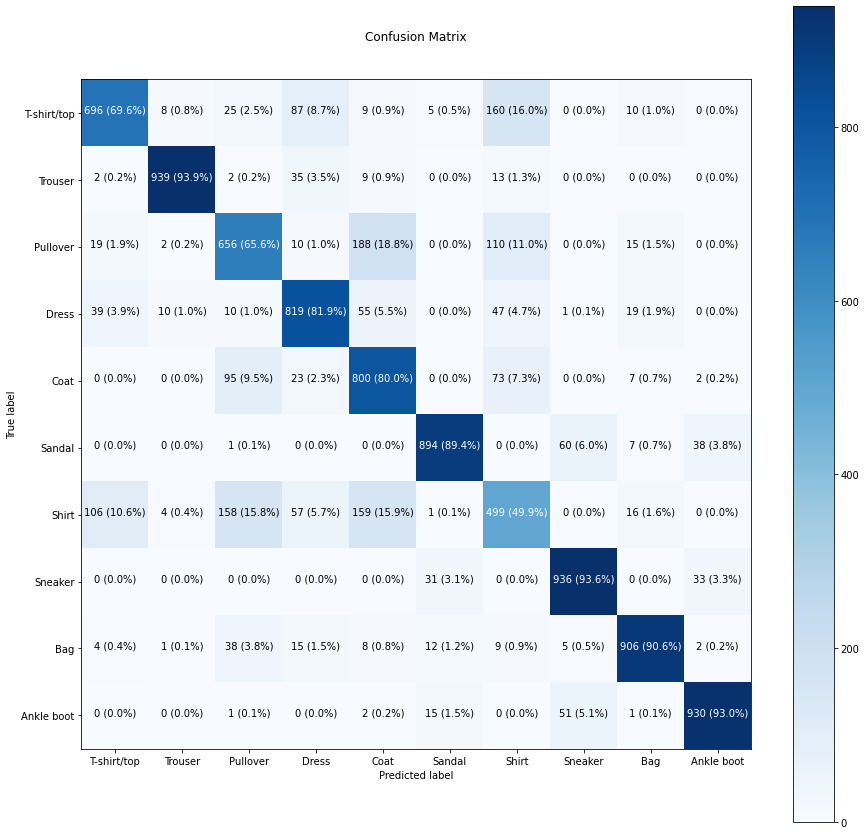

In [145]:
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

**Note:** Often when working with images and other forms of visual data its a good idea to visualise as much as possible to develop a further understanding of the data and the inputs and outputs of your models

How about we create a function for:
* Plot a random image
* make prediction on image
* label plot with truth label and predicted label

In [148]:
import random

def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

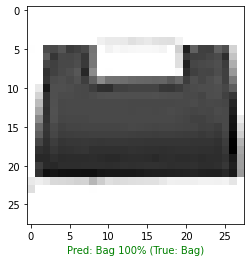

In [156]:
# Check out a random image aswell as it sprediction
plot_random_image(model=model_14,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning?

In [159]:
# Find the layers of our most recent model
model_14.layers

In [163]:
# Extract a particular layer
model_14.layers[1]

In [167]:
# Get the payyerns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape 

(array([[ 0.7150265 , -0.06077104, -0.9976307 , -1.0484309 ],
        [ 0.27732122, -0.4715538 , -0.52916485,  0.02329245],
        [ 0.775243  ,  0.54027563, -1.1288568 , -0.74261576],
        ...,
        [-0.39453435,  0.4762872 , -0.22641516,  0.25505933],
        [-0.40515792,  0.6181003 ,  0.23928401, -0.5038762 ],
        [ 0.2388457 ,  0.11606938, -0.12131395,  0.04352421]],
       dtype=float32), (784, 4))

## Now lets checkout the bias vector


In [169]:
# Bias and biases shapes
biases, biases.shape

(array([ 2.4485877e-02, -6.1457325e-04, -2.7230197e-01,  8.1124955e-01],
       dtype=float32), (4,))

Every unit has a bias vector, each of these is paired with a weight matrix

the bias vector gets initialised as zeros (at least in the case of a tensorflow dense layer)

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer

In [171]:
model_14.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_53 (Dense)            (None, 4)                 3140      
                                                                 
 dense_54 (Dense)            (None, 4)                 20        
                                                                 
 dense_55 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


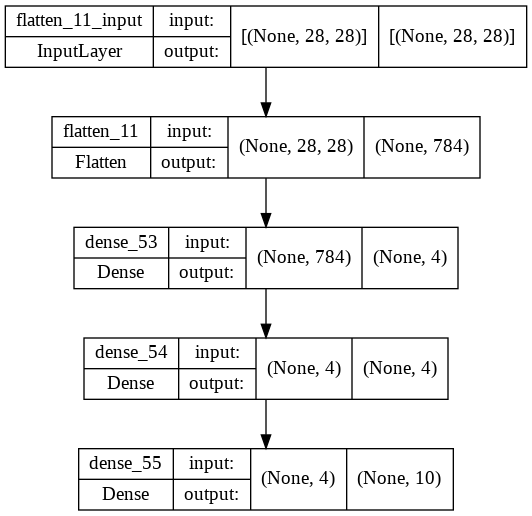

In [173]:
# Lets checkout another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# see inputs and outputs of each layer
plot_model(model_14,show_shapes=True)